In this project I am going to analyze a 20-year ridership dataset from the Chicago Transit Authority

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Here is the CTA ridership csv file that I will be manipulating

In [2]:
cta= pd.read_csv("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
cta.head()

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


Right now, the dates under the `service_date` column are strings. I am going to convert these dates into pandas.datetime format and assign them to a new column called Date so that they can be manipulated.

In [3]:
cta['Date']=pd.to_datetime(cta.service_date)
cta['Year'] = cta['Date'].dt.year
cta.tail(5)

,service_date,day_type,bus,rail_boardings,total_rides,Date,Year
7939,07/27/2022,W,446320,340006,786326,2022-07-27,2022
7940,07/28/2022,W,448728,380517,829245,2022-07-28,2022
7941,07/29/2022,W,430804,378849,809653,2022-07-29,2022
7942,07/30/2022,A,304052,327388,631440,2022-07-30,2022
7943,07/31/2022,U,224307,252781,477088,2022-07-31,2022


I am going to sort the values in this dataset by `Date` to find how many unique days there are

In [8]:
unique_days = (cta.Date[7943] - cta.Date[0])/np.timedelta64(1, 'D') + 1
print("There are " + str(unique_days) + " unique days in the dataset")

There are 7882.0 unique days in the dataset


I am now going to create a graph of the last 5 years of the dataset, and then compare total CTA ridership for the months of January in 2019 and 2022

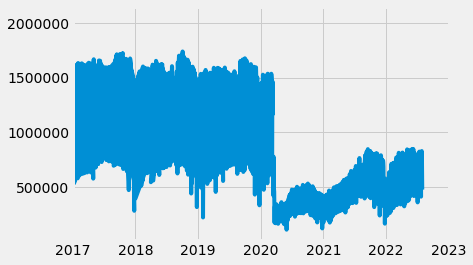

In [12]:
plt.plot(cta['Date'], cta['total_rides'])
plt.xlim((pd.to_datetime("2017-01-01") , pd.to_datetime("2023-01-01")))
plt.ticklabel_format(style = 'plain', axis = 'y')

In [13]:
a = np.sum(cta.loc[(cta['Date'] >= pd.to_datetime("2019-01-01")) & (cta['Date'] <= pd.to_datetime("2019-01-31"))]['total_rides'])
b = np.sum(cta.loc[(cta['Date'] >= pd.to_datetime("2022-01-01")) & (cta['Date'] <= pd.to_datetime("2022-01-31"))]['total_rides'])
print("CTA ridership has dropped " + str(np.round((a - b)/a * 100)) + "% from January 2019 to January 2022.")

CTA ridership has dropped 57.0% from January 2019 to January 2022.


I am now going to graph the daily bus usage vs the daily rail usage to find any anomalies within the dataset

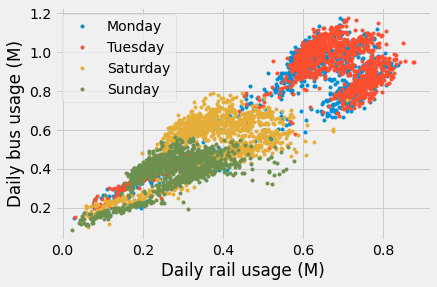

In [14]:
cta["dayofweek"] =cta['Date'].dt.dayofweek
dow = {0:"Monday", 1:"Tuesday", 5:"Saturday", 6:"Sunday"} 
for i in [0,1,5,6]: 
    r = (cta.dayofweek == i)
    plt.plot(cta.rail_boardings[r]/1E6, cta.bus[r]/1e6, '.', label = dow[i])
plt.legend()
plt.xlabel("Daily rail usage (M)")
plt.ylabel("Daily bus usage (M)");

There are days with very low usage (bottom left of the graph), that are likely caused by the pandemic